In [1]:
# Third-party
from astropy.constants import G
import astropy.coordinates as coord
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Third-party
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Custom
import gala.coordinates as gc
import gala.dynamics as gd
from gala.dynamics.mockstream import fardal_stream, streakline_stream
import gala.integrate as gi
import gala.potential as gp
from gala.units import galactic
from matplotlib import cm

from potential import default_mw
from coordinates import galcen_frame, pal5_c
from density import StreamSurfaceDensityModel

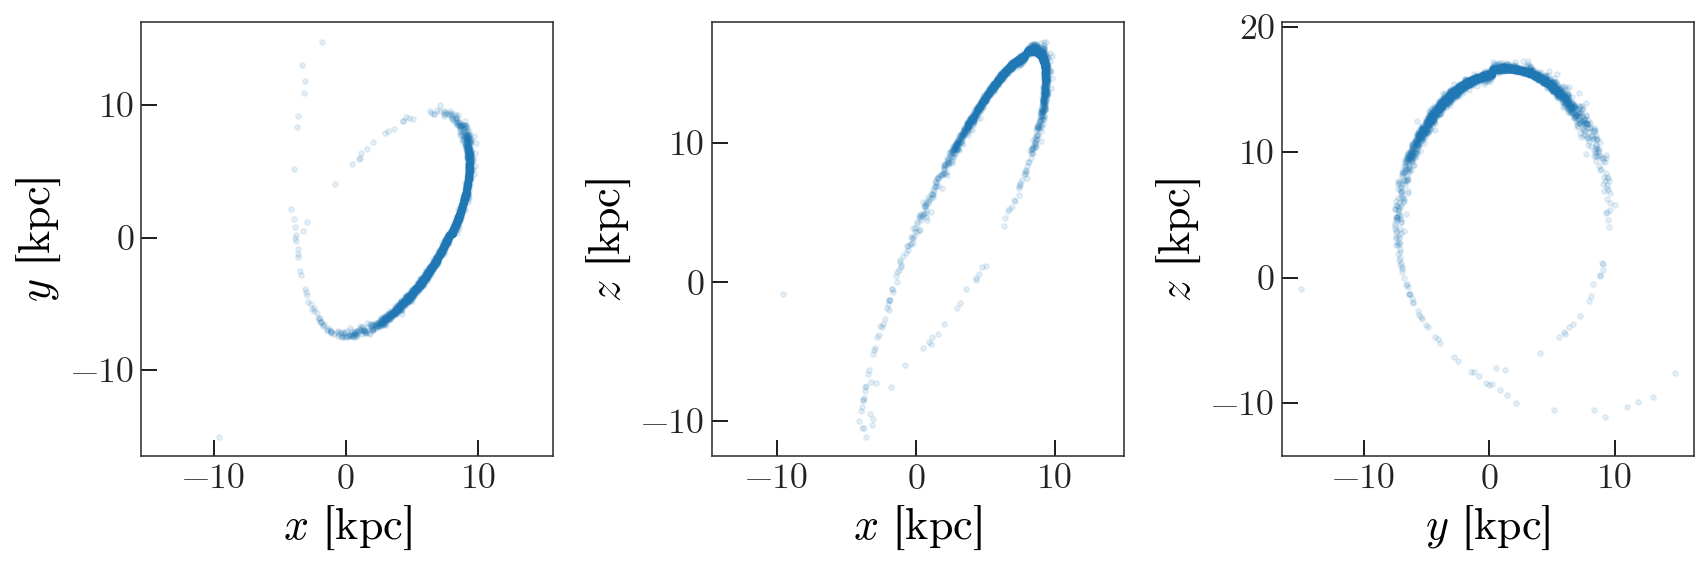

In [14]:
w0 = gd.PhaseSpacePosition(pal5_c.transform_to(galcen_frame).cartesian)
orbit = default_mw.integrate_orbit(w0, dt=-0.5, n_steps=8000, 
                                   Integrator=gi.DOPRI853Integrator)

stream = fardal_stream(default_mw, orbit[::-1], 
                       5E4*u.Msun, release_every=4)
_ = stream.plot(marker='.', alpha=0.1)

In [6]:
sim_c = stream.to_coord_frame(gc.Pal5, galactocentric_frame=galcen_frame)

---

## Density model

In [10]:
dens_model = StreamSurfaceDensityModel(sim_c, pal5_c, 
                                       lon_limits=[-50, 50]*u.deg,
                                       lat_limits=[-10, 40]*u.deg)

track = dens_model.get_dense_poly_track(size=10000)

spacing = 2
nodes = dens_model.set_nodes(spacing=spacing)

In [11]:
a_k = np.random.uniform(0, 1, size=dens_model.K)
s_k = np.random.uniform(0.5, 4, size=dens_model.K)

x, y = np.meshgrid(np.linspace(-50, 50, 128),
                   np.linspace(-10, 40, 128))
xy = np.stack((x.ravel(), y.ravel())).T

ln_dens = dens_model.ln_density(xy, a_k, s_k, h=1.5*spacing)

In [13]:
%timeit dens_model.ln_density(xy, a_k, s_k, h=1.5*spacing)

82.9 ms ± 4.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


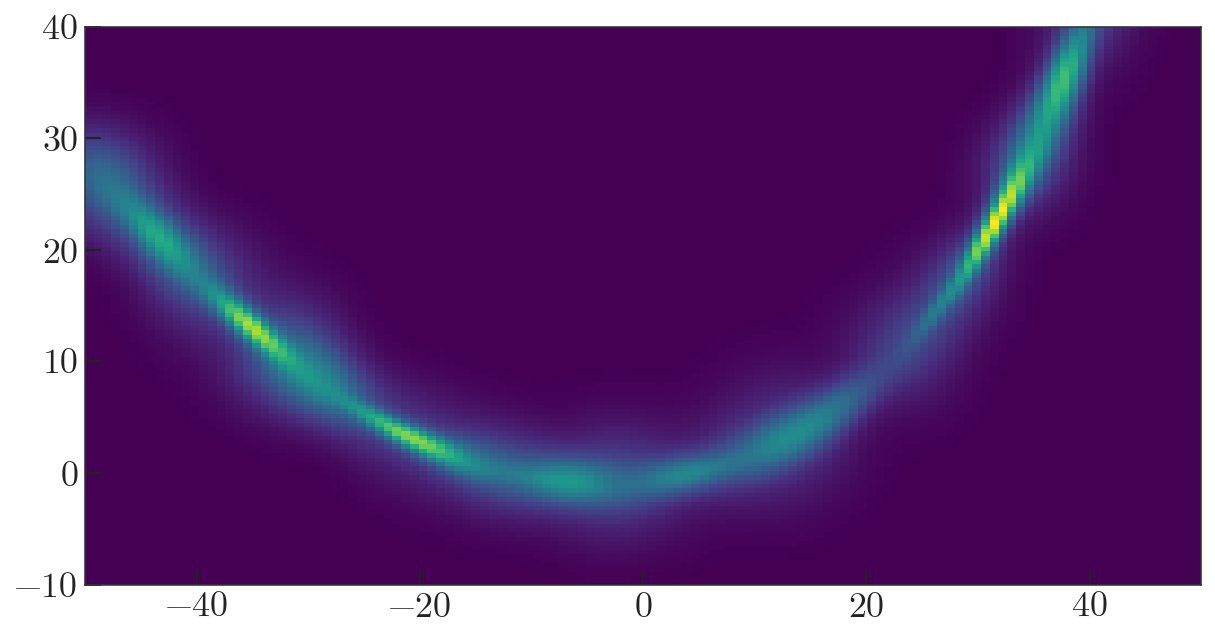

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.pcolormesh(x, y, np.exp(ln_dens.reshape(x.shape) - ln_dens.max()))
ax.set_aspect('equal')

In [267]:
# fig, ax = plt.subplots(1, 1, figsize=(10, 6))
# ax.plot(dens_model.proj_xy[0],
#         dens_model.proj_xy[1], 
#         ls='none')

# ax.plot(track[0], track[1], marker='')
    
# ax.scatter(nodes[0], nodes[1], color='r', zorder=100)
    
# # ax.scatter(tracks[0, i][k], tracks[1, i][k], zorder=100, color='r')
# # u_pt = tracks[:, i, k] + 7*uu
# # v_pt = tracks[:, i, k] + 7*vv
# # ax.plot([tracks[0, i][k], u_pt[0]], 
# #         [tracks[1, i][k], u_pt[1]],
# #         zorder=101, color='k')
# # ax.plot([tracks[0, i][k], v_pt[0]], 
# #         [tracks[1, i][k], v_pt[1]],
# #         zorder=101, color='#aaaaaa')
    
# ax.set_ylim(-5, 40)
# ax.set_aspect('equal')